In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
!pip install scikit-learn 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Data Frame Creation and Visualization**

In [4]:
matches= pd.read_csv('/content/drive/MyDrive/Pattern Project/WorldCupMatches.csv',encoding='latin-1')

print(matches.shape)
matches.head(10)

(999, 10)


,Year,Stage,Stadium,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Referee,Home Team Initials,Away Team Initials
0,1930.0,Group 1,Pocitos,France,4.0,1.0,Mexico,LOMBARDI Domingo (URU),FRA,MEX
1,1930.0,Group 4,Parque Central,USA,3.0,0.0,Belgium,MACIAS Jose (ARG),USA,BEL
2,1930.0,Group 2,Parque Central,Yugoslavia,2.0,1.0,Brazil,TEJADA Anibal (URU),YUG,BRA
3,1930.0,Group 3,Pocitos,Romania,3.0,1.0,Peru,WARNKEN Alberto (CHI),ROU,PER
4,1930.0,Group 1,Parque Central,Argentina,1.0,0.0,France,REGO Gilberto (BRA),ARG,FRA
5,1930.0,Group 1,Parque Central,Chile,3.0,0.0,Mexico,CRISTOPHE Henry (BEL),CHI,MEX
6,1930.0,Group 2,Parque Central,Yugoslavia,4.0,0.0,Bolivia,MATEUCCI Francisco (URU),YUG,BOL
7,1930.0,Group 4,Parque Central,USA,3.0,0.0,Paraguay,MACIAS Jose (ARG),USA,PAR
8,1930.0,Group 3,Estadio Centenario,Uruguay,1.0,0.0,Peru,LANGENUS Jean (BEL),URU,PER
9,1930.0,Group 1,Estadio Centenario,Chile,1.0,0.0,France,TEJADA Anibal (URU),CHI,FRA


In [5]:
cups= pd.read_csv('/content/drive/MyDrive/Pattern Project/WorldCupWinners.csv')
print(cups.shape)
cups.head(10)

(21, 8)


,Year,Country,Winner,Runners-Up,Third,Fourth,QualifiedTeams,MatchesPlayed
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,13,18
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,16,19
2,1938,France,Italy,Hungary,Brazil,Sweden,17,20
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,18,21
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,19,22
5,1958,Sweden,Brazil,Sweden,France,Germany FR,20,23
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,21,24
7,1966,England,England,Germany FR,Portugal,Soviet Union,22,25
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,23,26
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,24,27


In [6]:
matches.describe()

,Year,Home Team Goals,Away Team Goals
count,916.000000,916.000000,916.000000
mean,1987.388646,1.783843,1.036026
std,23.219966,1.596171,1.077242
min,1930.000000,0.000000,0.000000
25%,1970.000000,1.000000,0.000000
50%,1990.000000,1.000000,1.000000
75%,2006.000000,3.000000,2.000000
max,2018.000000,10.000000,7.000000


In [7]:
cups.describe()

,Year,QualifiedTeams,MatchesPlayed
count,21.000000,21.000000,21.000000
mean,1976.857143,24.904762,28.000000
std,26.657618,6.378909,6.204837
min,1930.000000,13.000000,18.000000
25%,1958.000000,20.000000,23.000000
50%,1978.000000,25.000000,28.000000
75%,1998.000000,30.000000,33.000000
max,2018.000000,35.000000,38.000000


# **Dealing with missing data**

In [8]:
matches.isnull().sum()

Year                  83
Stage                 83
Stadium               83
Home Team Name        83
Home Team Goals       83
Away Team Goals       83
Away Team Name        83
Referee               83
Home Team Initials    83
Away Team Initials    83
dtype: int64

In [9]:
cups.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
QualifiedTeams    0
MatchesPlayed     0
dtype: int64

In [10]:
matches= matches.dropna()

In [11]:
print(matches.shape)
matches.head(10) 

(916, 10)


,Year,Stage,Stadium,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Referee,Home Team Initials,Away Team Initials
0,1930.0,Group 1,Pocitos,France,4.0,1.0,Mexico,LOMBARDI Domingo (URU),FRA,MEX
1,1930.0,Group 4,Parque Central,USA,3.0,0.0,Belgium,MACIAS Jose (ARG),USA,BEL
2,1930.0,Group 2,Parque Central,Yugoslavia,2.0,1.0,Brazil,TEJADA Anibal (URU),YUG,BRA
3,1930.0,Group 3,Pocitos,Romania,3.0,1.0,Peru,WARNKEN Alberto (CHI),ROU,PER
4,1930.0,Group 1,Parque Central,Argentina,1.0,0.0,France,REGO Gilberto (BRA),ARG,FRA
5,1930.0,Group 1,Parque Central,Chile,3.0,0.0,Mexico,CRISTOPHE Henry (BEL),CHI,MEX
6,1930.0,Group 2,Parque Central,Yugoslavia,4.0,0.0,Bolivia,MATEUCCI Francisco (URU),YUG,BOL
7,1930.0,Group 4,Parque Central,USA,3.0,0.0,Paraguay,MACIAS Jose (ARG),USA,PAR
8,1930.0,Group 3,Estadio Centenario,Uruguay,1.0,0.0,Peru,LANGENUS Jean (BEL),URU,PER
9,1930.0,Group 1,Estadio Centenario,Chile,1.0,0.0,France,TEJADA Anibal (URU),CHI,FRA


# **Data Preprocessing and Feature Extraction**

In [12]:
matches

,Year,Stage,Stadium,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Referee,Home Team Initials,Away Team Initials
0,1930.0,Group 1,Pocitos,France,4.0,1.0,Mexico,LOMBARDI Domingo (URU),FRA,MEX
1,1930.0,Group 4,Parque Central,USA,3.0,0.0,Belgium,MACIAS Jose (ARG),USA,BEL
2,1930.0,Group 2,Parque Central,Yugoslavia,2.0,1.0,Brazil,TEJADA Anibal (URU),YUG,BRA
3,1930.0,Group 3,Pocitos,Romania,3.0,1.0,Peru,WARNKEN Alberto (CHI),ROU,PER
4,1930.0,Group 1,Parque Central,Argentina,1.0,0.0,France,REGO Gilberto (BRA),ARG,FRA
...,...,...,...,...,...,...,...,...,...,...
911,2018.0,Quarter-finals,"Fisht Olympic Stadium, Sochi",Russia,2.0,2.0,Croatia,Sandro Ricci (Brazil),RUS,CRO
912,2018.0,Semi-finals,"Krestovsky Stadium, Saint Petersburg",France,1.0,0.0,Belgium,Andrés Cunha (Uruguay),FRA,BEL
913,2018.0,Semi-finals,"Luzhniki Stadium, Moscow",Croatia,2.0,1.0,England,Cüneyt Çak?r (Turkey),CRO,ENG
914,2018.0,Third place,"Krestovsky Stadium, Saint Petersburg",Belgium,2.0,0.0,England,Alireza Faghani (Iran),BEL,ENG


In [13]:
def replace_name(df):
  if(df['Home Team Name'] in ['German DR', 'Germany FR']):
    df['Home Team Name'] = 'Germany'
  elif(df['Home Team Name']== 'Soviet Union'):
    df['Home Team Name']= 'Russia'
  elif(df['Home Team Name']== 'IR Iran'):
    df['Home Team Name']= 'Iran'

  if(df['Away Team Name'] in ['German DR', 'Germany FR']):
      df['Away Team Name'] = 'Germany'
  elif(df['Away Team Name']== 'Soviet Union'):
      df['Away Team Name']= 'Russia'
  elif(df['Home Team Name']== 'IR Iran'):
    df['Home Team Name']= 'Iran'

  return df

matches= matches.apply(replace_name, axis='columns')


In [14]:
matches

,Year,Stage,Stadium,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Referee,Home Team Initials,Away Team Initials
0,1930.0,Group 1,Pocitos,France,4.0,1.0,Mexico,LOMBARDI Domingo (URU),FRA,MEX
1,1930.0,Group 4,Parque Central,USA,3.0,0.0,Belgium,MACIAS Jose (ARG),USA,BEL
2,1930.0,Group 2,Parque Central,Yugoslavia,2.0,1.0,Brazil,TEJADA Anibal (URU),YUG,BRA
3,1930.0,Group 3,Pocitos,Romania,3.0,1.0,Peru,WARNKEN Alberto (CHI),ROU,PER
4,1930.0,Group 1,Parque Central,Argentina,1.0,0.0,France,REGO Gilberto (BRA),ARG,FRA
...,...,...,...,...,...,...,...,...,...,...
911,2018.0,Quarter-finals,"Fisht Olympic Stadium, Sochi",Russia,2.0,2.0,Croatia,Sandro Ricci (Brazil),RUS,CRO
912,2018.0,Semi-finals,"Krestovsky Stadium, Saint Petersburg",France,1.0,0.0,Belgium,Andrés Cunha (Uruguay),FRA,BEL
913,2018.0,Semi-finals,"Luzhniki Stadium, Moscow",Croatia,2.0,1.0,England,Cüneyt Çak?r (Turkey),CRO,ENG
914,2018.0,Third place,"Krestovsky Stadium, Saint Petersburg",Belgium,2.0,0.0,England,Alireza Faghani (Iran),BEL,ENG


In [15]:
teamName= {}
i=0
for idx, row in matches.iterrows():
  name= row['Home Team Name']
  if(name not in teamName.keys()):
    teamName[name] = i
    i+=1
  name= row['Away Team Name']
  if(name not in teamName.keys()):
    teamName[name] = i
    i+=1
teamName

{'France': 0,
 'Mexico': 1,
 'USA': 2,
 'Belgium': 3,
 'Yugoslavia': 4,
 'Brazil': 5,
 'Romania': 6,
 'Peru': 7,
 'Argentina': 8,
 'Chile': 9,
 'Bolivia': 10,
 'Paraguay': 11,
 'Uruguay': 12,
 'Austria': 13,
 'Hungary': 14,
 'Egypt': 15,
 'Switzerland': 16,
 'Netherlands': 17,
 'Sweden': 18,
 'Germany': 19,
 'Spain': 20,
 'Italy': 21,
 'Czechoslovakia': 22,
 'Dutch East Indies': 23,
 'Cuba': 24,
 'Norway': 25,
 'Poland': 26,
 'England': 27,
 'Scotland': 28,
 'Turkey': 29,
 'Korea Republic': 30,
 'Russia': 31,
 'Wales': 32,
 'Northern Ireland': 33,
 'Colombia': 34,
 'Bulgaria': 35,
 'Korea DPR': 36,
 'Portugal': 37,
 'Israel': 38,
 'Morocco': 39,
 'El Salvador': 40,
 'Australia': 41,
 'Zaire': 42,
 'Haiti': 43,
 'Tunisia': 44,
 'IR Iran': 45,
 'Iran': 46,
 'Cameroon': 47,
 'New Zealand': 48,
 'Algeria': 49,
 'Honduras': 50,
 'Kuwait': 51,
 'Canada': 52,
 'Iraq': 53,
 'Denmark': 54,
 'rn">United Arab Emirates': 55,
 'Costa Rica': 56,
 'rn">Republic of Ireland': 57,
 'Saudi Arabia': 58,
 

In [16]:
MainMatches= matches.drop(["Stadium","Stage","Referee", "Home Team Initials","Away Team Initials"], axis='columns')

print(MainMatches.to_string())

       Year              Home Team Name  Home Team Goals  Away Team Goals              Away Team Name
0    1930.0                      France              4.0              1.0                      Mexico
1    1930.0                         USA              3.0              0.0                     Belgium
2    1930.0                  Yugoslavia              2.0              1.0                      Brazil
3    1930.0                     Romania              3.0              1.0                        Peru
4    1930.0                   Argentina              1.0              0.0                      France
5    1930.0                       Chile              3.0              0.0                      Mexico
6    1930.0                  Yugoslavia              4.0              0.0                     Bolivia
7    1930.0                         USA              3.0              0.0                    Paraguay
8    1930.0                     Uruguay              1.0              0.0         

In [17]:
champion = cups['Winner'].map(lambda p: 'Germany' if p=='Germany FR' else p).value_counts()
champion

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
France       2
England      1
Spain        1
Name: Winner, dtype: int64

In [18]:
MainMatches['Home Team Winner'] = 0
MainMatches['Away Team Winner'] = 0

def count_champion(df):
  if(champion.get(df['Home Team Name']) != None):
    df['Home Team Winner'] = champion.get(df['Home Team Name'])
  if(champion.get(df['Away Team Name']) != None):
    df['Away Team Winner'] = champion.get(df['Away Team Name'])
  return df

MainMatches = MainMatches.apply(count_champion, axis='columns')

MainMatches

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Home Team Winner,Away Team Winner
0,1930.0,France,4.0,1.0,Mexico,2,0
1,1930.0,USA,3.0,0.0,Belgium,0,0
2,1930.0,Yugoslavia,2.0,1.0,Brazil,0,5
3,1930.0,Romania,3.0,1.0,Peru,0,0
4,1930.0,Argentina,1.0,0.0,France,2,2
...,...,...,...,...,...,...,...
911,2018.0,Russia,2.0,2.0,Croatia,0,0
912,2018.0,France,1.0,0.0,Belgium,2,0
913,2018.0,Croatia,2.0,1.0,England,0,1
914,2018.0,Belgium,2.0,0.0,England,0,1


In [19]:
def winners(df):
  #if(df["Home Team Goals"] == df["Away Team Goals"]):
   # df["Winner"] = 0   # 0 means draw
  #elif(df["Home Team Goals"] > df["Away Team Goals"]):
  if(df["Home Team Goals"] > df["Away Team Goals"]):
    df["Winner"] = 0   # 0 means home team winner
  else:
    df["Winner"] = 1   # 1 means away team winner

  return df


MainMatches = MainMatches.apply(winners, axis="columns")

MainMatches

# Here when home team winner=how many times the home team has won world cups 

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Home Team Winner,Away Team Winner,Winner
0,1930.0,France,4.0,1.0,Mexico,2,0,0
1,1930.0,USA,3.0,0.0,Belgium,0,0,0
2,1930.0,Yugoslavia,2.0,1.0,Brazil,0,5,0
3,1930.0,Romania,3.0,1.0,Peru,0,0,0
4,1930.0,Argentina,1.0,0.0,France,2,2,0
...,...,...,...,...,...,...,...,...
911,2018.0,Russia,2.0,2.0,Croatia,0,0,1
912,2018.0,France,1.0,0.0,Belgium,2,0,0
913,2018.0,Croatia,2.0,1.0,England,0,1,0
914,2018.0,Belgium,2.0,0.0,England,0,1,0


In [20]:
def replaceTeamName(df):
  df['Home Team Name'] = teamName[df['Home Team Name']]
  df['Away Team Name'] = teamName[df['Away Team Name']]
  return df

finalMatches= MainMatches.apply(replaceTeamName, axis='columns')

finalMatches

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Home Team Winner,Away Team Winner,Winner
0,1930.0,0,4.0,1.0,1,2,0,0
1,1930.0,2,3.0,0.0,3,0,0,0
2,1930.0,4,2.0,1.0,5,0,5,0
3,1930.0,6,3.0,1.0,7,0,0,0
4,1930.0,8,1.0,0.0,0,2,2,0
...,...,...,...,...,...,...,...,...
911,2018.0,31,2.0,2.0,64,0,0,1
912,2018.0,0,1.0,0.0,3,2,0,0
913,2018.0,64,2.0,1.0,27,0,1,0
914,2018.0,3,2.0,0.0,27,0,1,0


In [21]:
num_label_3 = finalMatches[finalMatches['Winner'] == 0]['Winner'].count()
print(f"Number of samples with label 3 in the 'winner' feature: {num_label_3}")


Number of samples with label 3 in the 'winner' feature: 514


# **Exploratory Data Analysis on Preprocessed Dataset**

In [22]:
finalMatches.describe()

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Home Team Winner,Away Team Winner,Winner
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,1987.388646,22.752183,1.783843,1.036026,26.528384,1.421397,0.676856,0.438865
std,23.219966,19.175541,1.596171,1.077242,21.225880,1.836884,1.350308,0.496519
min,1930.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1970.000000,8.000000,1.000000,0.000000,9.000000,0.000000,0.000000,0.000000
50%,1990.000000,19.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000
75%,2006.000000,30.000000,3.000000,2.000000,39.000000,2.000000,1.000000,1.000000
max,2018.000000,85.000000,10.000000,7.000000,85.000000,5.000000,5.000000,1.000000


In [23]:
len(finalMatches)

916

In [24]:
print(finalMatches.shape)

(916, 8)


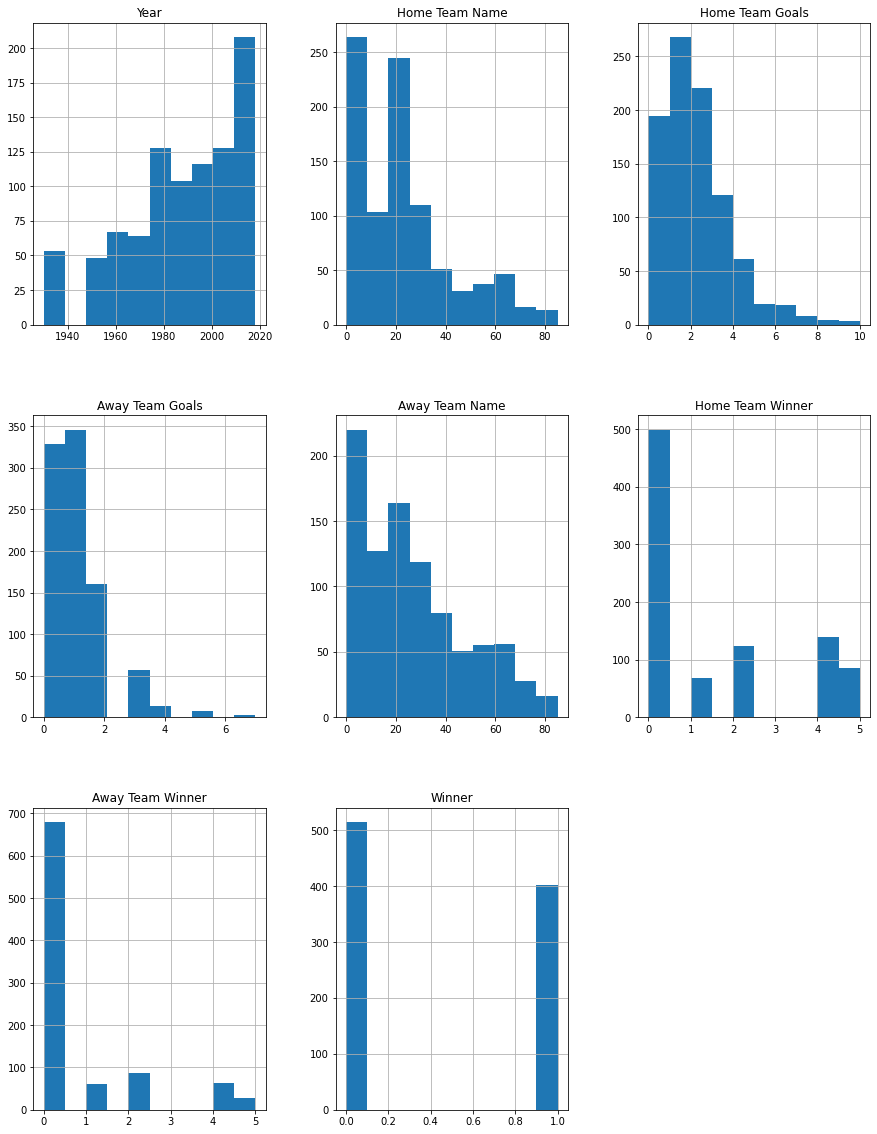

In [25]:
finalMatches.hist(figsize=(15,20))
plt.show()

[Text(0, 0.5, 'Total World Cup Wins'), Text(0.5, 0, 'Team Name')]

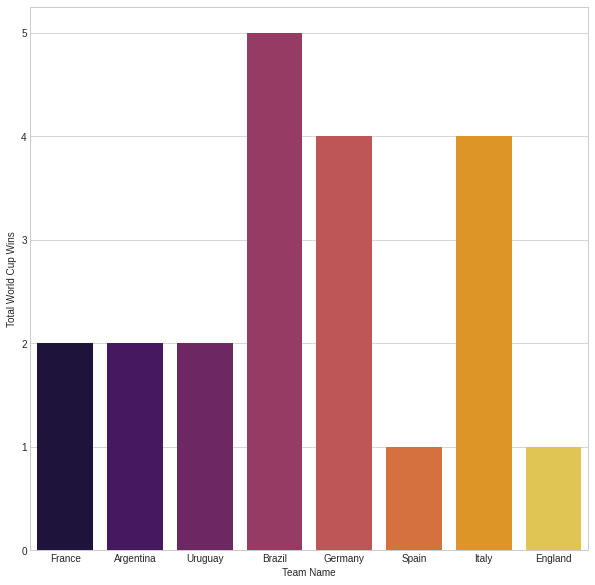

In [26]:
#Plotting WorldCup Winners

winnerdata = MainMatches[MainMatches['Home Team Winner'] > 0]
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))
ax=sns.barplot(x="Home Team Name", y="Home Team Winner", data=winnerdata, palette='inferno')
ax.set(xlabel='Team Name', ylabel='Total World Cup Wins')

# **Data Augmentation**

In [27]:
finalMatches= finalMatches.drop(["Year"], axis='columns')

In [28]:
finalMatches

,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Home Team Winner,Away Team Winner,Winner
0,0,4.0,1.0,1,2,0,0
1,2,3.0,0.0,3,0,0,0
2,4,2.0,1.0,5,0,5,0
3,6,3.0,1.0,7,0,0,0
4,8,1.0,0.0,0,2,2,0
...,...,...,...,...,...,...,...
911,31,2.0,2.0,64,0,0,1
912,0,1.0,0.0,3,2,0,0
913,64,2.0,1.0,27,0,1,0
914,3,2.0,0.0,27,0,1,0


In [29]:
#features

x = finalMatches.loc[:,['Home Team Name','Away Team Name', 'Home Team Winner', 'Away Team Winner']]
x= np.array(x).astype('int')
x

array([[ 0,  1,  2,  0],
       [ 2,  3,  0,  0],
       [ 4,  5,  0,  5],
       ...,
       [64, 27,  0,  1],
       [ 3, 27,  0,  1],
       [ 0, 64,  2,  0]])

In [30]:
x1 = x.copy()


x1[:,0] = x[:,1]
x1[:,1] = x[:,0]
x1[:,2] = x[:,3]
x1[:,3] = x[:,2]

x1

array([[ 1,  0,  0,  2],
       [ 3,  2,  0,  0],
       [ 5,  4,  5,  0],
       ...,
       [27, 64,  1,  0],
       [27,  3,  1,  0],
       [64,  0,  0,  2]])

In [31]:
X= np.concatenate((x,x1), axis= 0)
print(len(X))
X

1832


array([[ 0,  1,  2,  0],
       [ 2,  3,  0,  0],
       [ 4,  5,  0,  5],
       ...,
       [27, 64,  1,  0],
       [27,  3,  1,  0],
       [64,  0,  0,  2]])

In [32]:
#labels

y = finalMatches.loc[:,['Winner']]
y= np.array(y).astype('int')
y = np.reshape(y,(1,916)) #convert to 1d array
y = y[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [33]:
y1 = y.copy()

for i in range(len(y1)):
  if(y1[i]==0):
    y1[i] = 1
  elif(y1[i] ==1):
    y1[i] = 0

y1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,

In [34]:
Y= np.concatenate((y,y1))
print(len(Y))
Y

1832


array([0, 0, 0, ..., 1, 1, 1])

# **Splitting Data into Train and Test**

In [35]:
X,Y= shuffle(X,Y)


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

print(len(X_train),len(X_test),len(Y_train),len(Y_test))

1465 367 1465 367


# **KNN**

Confusion matrix:
[[110  72]
 [ 84 101]]


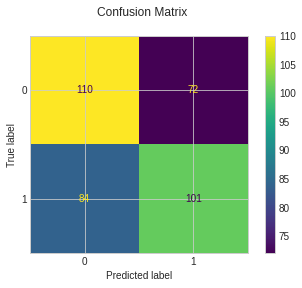

In [36]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)

#Predicting on the test set

Y_pred = KNN.predict(X_test)

#confusion matrix
from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [37]:
#accuracy and classification report
KnnAcc= metrics.accuracy_score(Y_test, Y_pred)
print(KnnAcc)
print(classification_report(Y_test, Y_pred))

0.5749318801089919
              precision    recall  f1-score   support

           0       0.57      0.60      0.59       182
           1       0.58      0.55      0.56       185

    accuracy                           0.57       367
   macro avg       0.58      0.58      0.57       367
weighted avg       0.58      0.57      0.57       367



In [38]:
#prediction function
def predictionKNN(team1, team2):
  id1 = teamName[team1]
  id2 = teamName[team2]
  champion1 = champion.get(team1) if champion.get(team1) != None else 0
  champion2 = champion.get(team2) if champion.get(team2) != None else 0

  x = np.array([id1, id2, champion1, champion2]).astype('int')
  x = np.reshape(x, (1,-1))

  _y = KNN.predict_proba(x)[0]
  
  #textKNN = ('Chance for '+team1+' to win against '+team2+' is {:.2f}%\nChance for '+team2+' to win against '+team1+' is {:.2f}%\nChance for '+team1+' and '+team2+' to draw is {:.2f}%').format(_y[1]*100,_y[2]*100,_y[0]*100)
  textKNN = ('Chance for '+team1+' to win against '+team2+' is {:.2f}%\nChance for '+team2+' to win against '+team1+' is {:.2f}%').format(_y[0]*100,_y[1]*100)
  
  return _y[0], textKNN

In [39]:
#prediction
probKNN, textKNN = predictionKNN('England', 'France')
print(textKNN)

Chance for England to win against France is 80.00%
Chance for France to win against England is 20.00%


0.5751707751707752


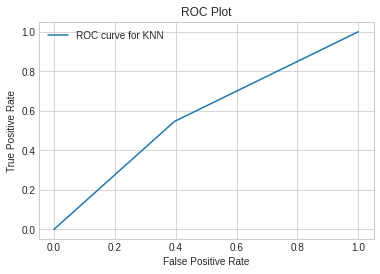

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

KNN_fpr, KNN_tpr,_= roc_curve(Y_test,Y_pred)

import matplotlib.pyplot as plt

KNN_auc = roc_auc_score(Y_test,Y_pred)
print(KNN_auc)
plt.plot(KNN_fpr,KNN_tpr,label='ROC curve for KNN')


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# **Naive Bayes**

Confusion matrix:
[[109  73]
 [ 79 106]]


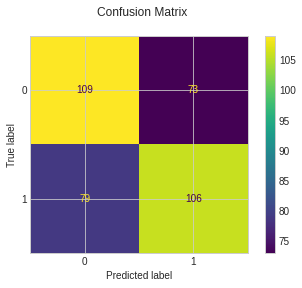

In [41]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, Y_train)

#Predicting on the test set
Y_pred2 = NB.predict(X_test)

from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred2)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [42]:
#accuracy and classification report
NBAcc= metrics.accuracy_score(Y_test, Y_pred2)
print(NBAcc)
print(classification_report(Y_test, Y_pred2))

0.5858310626702997
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       182
           1       0.59      0.57      0.58       185

    accuracy                           0.59       367
   macro avg       0.59      0.59      0.59       367
weighted avg       0.59      0.59      0.59       367



In [43]:
def predictionNB(team1, team2):
  id1 = teamName[team1]
  id2 = teamName[team2]
  champion1 = champion.get(team1) if champion.get(team1) != None else 0
  champion2 = champion.get(team2) if champion.get(team2) != None else 0

  x = np.array([id1, id2, champion1, champion2]).astype('int')
  x = np.reshape(x, (1,-1))
  _y = NB.predict_proba(x)[0]

  #textNB = ('Chance for '+team1+' to win against '+team2+' is {:.2f}%\nChance for '+team2+' to win against '+team1+' is {:.2f}%\nChance for '+team1+' and '+team2+' to draw is {:.2f}%').format(_y[1]*100,_y[2]*100,_y[0]*100)
  textNB = ('Chance for '+team1+' to win against '+team2+' is {:.2f}%\nChance for '+team2+' to win against '+team1+' is {:.2f}%').format(_y[0]*100,_y[1]*100)
  return _y[0], textNB

In [44]:
probNB, textNB = predictionNB('France', 'England')
print(textNB)

Chance for France to win against England is 61.57%
Chance for England to win against France is 38.43%


# **Decision Tree**

Confusion matrix:
[[109  73]
 [ 91  94]]


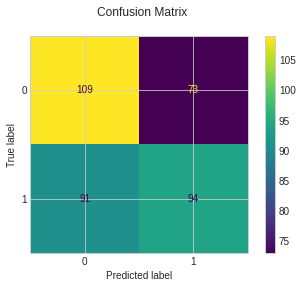

In [45]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train)

#Predicting on the test set
Y_pred3 = DT.predict(X_test)

from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred3)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [46]:
#accuracy and classification report
DTAcc= metrics.accuracy_score(Y_test, Y_pred3)
print(DTAcc)

print(classification_report(Y_test, Y_pred3))

0.553133514986376
              precision    recall  f1-score   support

           0       0.55      0.60      0.57       182
           1       0.56      0.51      0.53       185

    accuracy                           0.55       367
   macro avg       0.55      0.55      0.55       367
weighted avg       0.55      0.55      0.55       367



In [47]:
def predictionDT(team1, team2):
  id1 = teamName[team1]
  id2 = teamName[team2]
  champion1 = champion.get(team1) if champion.get(team1) != None else 0
  champion2 = champion.get(team2) if champion.get(team2) != None else 0

  x = np.array([id1, id2, champion1, champion2]).astype('int')
  x = np.reshape(x, (1,-1))
  _y = DT.predict_proba(x)[0]

  textDT = ('Chance for '+team1+' to win against '+team2+' is {:.2f}%\nChance for '+team2+' to win against '+team1+' is {:.2f}%').format(_y[0]*100,_y[1]*100)
  return _y[0], textDT

In [48]:
prob3, DTout = predictionDT('France', 'England')
print(DTout)

Chance for France to win against England is 0.00%
Chance for England to win against France is 100.00%


# **Random Forest**

Confusion matrix:
[[113  69]
 [ 80 105]]


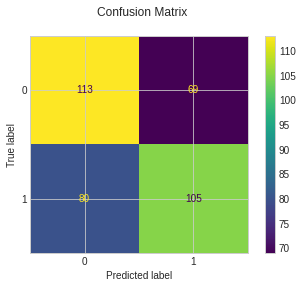

In [49]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)

#Predicting on the test set
Y_pred4 = RF.predict(X_test)

from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred4)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [50]:
#accuracy and classification report
RFAcc= metrics.accuracy_score(Y_test, Y_pred4)
print(RFAcc)
print(classification_report(Y_test, Y_pred4))

0.5940054495912807
              precision    recall  f1-score   support

           0       0.59      0.62      0.60       182
           1       0.60      0.57      0.58       185

    accuracy                           0.59       367
   macro avg       0.59      0.59      0.59       367
weighted avg       0.59      0.59      0.59       367



In [51]:
def predictionRF(team1, team2):
  id1 = teamName[team1]
  id2 = teamName[team2]
  champion1 = champion.get(team1) if champion.get(team1) != None else 0
  champion2 = champion.get(team2) if champion.get(team2) != None else 0

  x = np.array([id1, id2, champion1, champion2]).astype('int')
  x = np.reshape(x, (1,-1))
  _y = RF.predict_proba(x)[0]

  textRF = ('Chance for '+team1+' to win against '+team2+' is {:.2f}%\nChance for '+team2+' to win against '+team1+' is {:.2f}%').format(_y[0]*100,_y[1]*100)
  return _y[0], textRF

In [52]:
probRF, textRF = predictionRF('France', 'England')
print(textRF)

Chance for France to win against England is 5.00%
Chance for England to win against France is 95.00%


# **Logistic Regression**

Confusion matrix:
[[110  72]
 [ 82 103]]


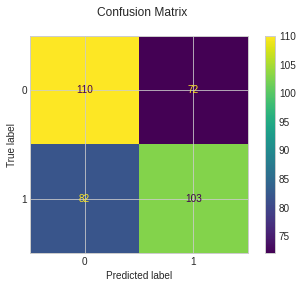

In [53]:
from sklearn.linear_model import LogisticRegression


LR = LogisticRegression(max_iter=2000)

LR.fit(X_train, Y_train)

Y_pred5 = LR.predict(X_test)

from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred5)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()


In [54]:
print(f"Unique values in Y_test: {np.unique(Y_test)}")
print(f"Unique values in Y_pred5: {np.unique(Y_pred5)}")


Unique values in Y_test: [0 1]
Unique values in Y_pred5: [0 1]


In [55]:
#accuracy and classification report
LRAcc= metrics.accuracy_score(Y_test, Y_pred5)
print(LRAcc)

print(classification_report(Y_test, Y_pred5))

0.5803814713896458
              precision    recall  f1-score   support

           0       0.57      0.60      0.59       182
           1       0.59      0.56      0.57       185

    accuracy                           0.58       367
   macro avg       0.58      0.58      0.58       367
weighted avg       0.58      0.58      0.58       367



In [56]:
def predictionLR(team1, team2):
  id1 = teamName[team1]
  id2 = teamName[team2]
  champion1 = champion.get(team1) if champion.get(team1) != None else 0
  champion2 = champion.get(team2) if champion.get(team2) != None else 0

  x = np.array([id1, id2, champion1, champion2]).astype('int')
  x = np.reshape(x, (1,-1))
  _y = LR.predict_proba(x)[0]

  textLR = ('Chance for '+team1+' to win against '+team2+' is {:.2f}%\nChance for '+team2+' to win against '+team1+' is {:.2f}%').format(_y[0]*100,_y[1]*100)
  return _y[0], textLR

In [57]:
prob1, LRout = predictionLR('France', 'England')
print(LRout)

Chance for France to win against England is 62.51%
Chance for England to win against France is 37.49%


# **SVM**

Confusion matrix:
[[113  69]
 [ 79 106]]


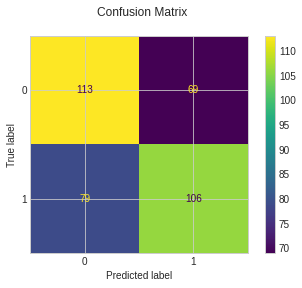

In [58]:
#Train by SVM
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True)
svm_model.fit(X_train, Y_train)

#Predicting on the test set
Y_pred6 = svm_model.predict(X_test)

from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred6)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [59]:
#accuracy and classification report
SVMAcc= metrics.accuracy_score(Y_test, Y_pred6)
print(SVMAcc)

print(classification_report(Y_test, Y_pred6))

0.5967302452316077
              precision    recall  f1-score   support

           0       0.59      0.62      0.60       182
           1       0.61      0.57      0.59       185

    accuracy                           0.60       367
   macro avg       0.60      0.60      0.60       367
weighted avg       0.60      0.60      0.60       367



In [60]:
def predictionSVM(team1, team2):
  id1 = teamName[team1]
  id2 = teamName[team2]
  champion1 = champion.get(team1) if champion.get(team1) != None else 0
  champion2 = champion.get(team2) if champion.get(team2) != None else 0

  x = np.array([id1, id2, champion1, champion2]).astype('float64')
  x = np.reshape(x, (1,-1))
  _y = svm_model.predict_proba(x)[0]

  textSVM = ('Chance for '+team1+' to win against '+team2+' is {:.2f}%\nChance for '+team2+' to win against '+team1+' is {:.2f}%').format(_y[0]*100,_y[1]*100)
  return _y[0], textSVM

In [61]:
probSVM, textSVM = predictionSVM('France', 'England')
print(textSVM)

Chance for France to win against England is 53.60%
Chance for England to win against France is 46.40%


# **Gradient Boosting**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


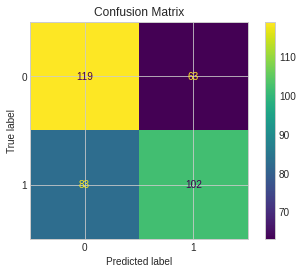

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# Create a Gradient Boosting classifier object
GB = GradientBoostingClassifier()

# Train the model on the training set
GB.fit(X_train, Y_train)

# Predict on the test set
Y_pred7 = GB.predict(X_test)

# Generate and plot the confusion matrix
disp = metrics.plot_confusion_matrix(GB, X_test, Y_test)
disp.ax_.set_title("Confusion Matrix")
plt.show()

In [63]:
#accuracy and classification report
GBAcc= metrics.accuracy_score(Y_test, Y_pred7)
print(GBAcc)

print(classification_report(Y_test, Y_pred7))

0.6021798365122616
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       182
           1       0.62      0.55      0.58       185

    accuracy                           0.60       367
   macro avg       0.60      0.60      0.60       367
weighted avg       0.60      0.60      0.60       367



In [64]:
#prediction function
def predictionGB(team1, team2):
  id1 = teamName[team1]
  id2 = teamName[team2]
  champion1 = champion.get(team1) if champion.get(team1) != None else 0
  champion2 = champion.get(team2) if champion.get(team2) != None else 0

  x = np.array([id1, id2, champion1, champion2]).astype('int')
  x = np.reshape(x, (1,-1))

  _y = GB.predict_proba(x)[0]
  textGB = ('Chance for '+team1+' to win against '+team2+' is {:.2f}%\nChance for '+team2+' to win against '+team1+' is {:.2f}%').format(_y[0]*100,_y[1]*100)
  
  return _y[0], textGB


In [65]:
#prediction
probGB, textGB = predictionGB('England', 'France')
print(textGB)

Chance for England to win against France is 49.73%
Chance for France to win against England is 50.27%


# **Comparing Accuracy of all models**

In [66]:
print('K-Nearest Neighbor Classifier: {:.2f}%'.format(KnnAcc*100))
print('Naive Bayes Classifier: {:.2f}%'.format(NBAcc*100))
print('Decision Tree Classifier: {:.2f}%'.format(DTAcc*100))
print('Random Forest Classifier: {:.2f}%'.format(RFAcc*100))
print('Logistic Regression Classifier: {:.2f}%'.format(LRAcc*100))
print('Support Vector Machine Classifier: {:.2f}%'.format(SVMAcc*100))
print('Gradient Boosting Classifier: {:.2f}%'.format(GBAcc*100))

K-Nearest Neighbor Classifier: 57.49%
Naive Bayes Classifier: 58.58%
Decision Tree Classifier: 55.31%
Random Forest Classifier: 59.40%
Logistic Regression Classifier: 58.04%
Support Vector Machine Classifier: 59.67%
Gradient Boosting Classifier: 60.22%


# **Building Our Ensemble Model**

In [67]:
from sklearn.ensemble import VotingClassifier
estimators=[('KNN', KNN),('DT', DT)]
ourEnsembleModel = VotingClassifier(estimators, voting='hard')

In [68]:
#fit model to training data
ourEnsembleModel.fit(X_train, Y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier()),
                             ('DT', DecisionTreeClassifier())])

Confusion matrix:
[[132  50]
 [113  72]]


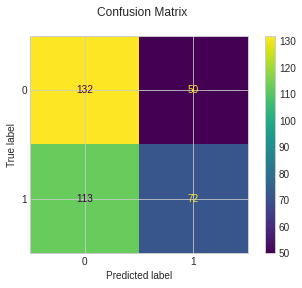

In [69]:
#Predicting on the test set
Y_predFinal = ourEnsembleModel.predict(X_test)

from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_predFinal)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [70]:
#accuracy and classification report
Accuracy= metrics.accuracy_score(Y_test, Y_predFinal)
print(Accuracy)
print(classification_report(Y_test, Y_predFinal))

0.555858310626703
              precision    recall  f1-score   support

           0       0.54      0.73      0.62       182
           1       0.59      0.39      0.47       185

    accuracy                           0.56       367
   macro avg       0.56      0.56      0.54       367
weighted avg       0.56      0.56      0.54       367



In [71]:
def ourPrediction(team1, team2):
  id1 = teamName[team1]
  id2 = teamName[team2]
  champion1 = champion.get(team1) if champion.get(team1) != None else 0
  champion2 = champion.get(team2) if champion.get(team2) != None else 0

  x = np.array([id1, id2, champion1, champion2]).astype('float64')
  x = np.reshape(x, (1,-1))
  _y = ourEnsembleModel.predict_proba(x)[0]

  textFinal = ('Chance for '+team1+' to win against '+team2+' is {:.2f}%\nChance for '+team2+' to win against '+team1+' is {:.2f}%').format(_y[0]*100,_y[1]*100)
  return _y[0], textFinal

In [72]:
def ourPrediction(team1, team2):
  id1 = teamName[team1]
  id2 = teamName[team2]
  champion1 = champion.get(team1) if champion.get(team1) != None else 0
  champion2 = champion.get(team2) if champion.get(team2) != None else 0

  x = np.array([id1, id2, champion1, champion2]).astype('float64')
  x = np.reshape(x, (1,-1))
  y_pred = ourEnsembleModel.predict(x)[0]

  if y_pred == 1:
    textFinal = ('Chance for '+team1+' to win against '+team2+' is {:.2f}%\nChance for '+team2+' to win against '+team1+' is {:.2f}%').format(ourEnsembleModel.score(X_test, Y_test)*100, (1-ourEnsembleModel.score(X_test, Y_test))*100)
  elif y_pred == 2:
    textFinal = ('Chance for '+team1+' to win against '+team2+' is {:.2f}%\nChance for '+team2+' to win against '+team1+' is {:.2f}%').format(ourEnsembleModel.score(X_test, Y_test)*100, (1-ourEnsembleModel.score(X_test, Y_test))*100)
  
  return y_pred, textFinal


In [73]:
probFinal, textFinal = ourPrediction('France', 'England')
print(textFinal)

Chance for France to win against England is 55.59%
Chance for England to win against France is 44.41%


# **ROC CURVE**

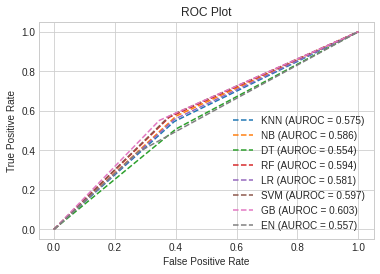

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#ROC AUC Score
KNN_auc = roc_auc_score(Y_test,Y_pred)
NB_auc = roc_auc_score(Y_test,Y_pred2)
DT_auc = roc_auc_score(Y_test,Y_pred3)
RF_auc = roc_auc_score(Y_test,Y_pred4)
LR_auc = roc_auc_score(Y_test,Y_pred5)
SVM_auc = roc_auc_score(Y_test,Y_pred6)
GB_auc = roc_auc_score(Y_test,Y_pred7)
EN_auc = roc_auc_score(Y_test,Y_predFinal)



#ROC score
KNN_fpr, KNN_tpr,_= roc_curve(Y_test,Y_pred)
NB_fpr, NB_tpr,_= roc_curve(Y_test,Y_pred2)
DT_fpr, DT_tpr,_= roc_curve(Y_test,Y_pred3)
RF_fpr, RF_tpr,_= roc_curve(Y_test,Y_pred4)
LR_fpr, LR_tpr,_= roc_curve(Y_test,Y_pred5)
SVM_fpr, SVM_tpr,_= roc_curve(Y_test,Y_pred6)
GB_fpr, GB_tpr,_= roc_curve(Y_test,Y_pred7)
EN_fpr, EN_tpr,_= roc_curve(Y_test,Y_predFinal)


plt.plot(KNN_fpr,KNN_tpr, linestyle='--', label='KNN (AUROC = %0.3f)' % KNN_auc)
plt.plot(NB_fpr,NB_tpr, linestyle='--', label='NB (AUROC = %0.3f)' % NB_auc)
plt.plot(DT_fpr,DT_tpr, linestyle='--', label='DT (AUROC = %0.3f)' % DT_auc)
plt.plot(RF_fpr,RF_tpr, linestyle='--', label='RF (AUROC = %0.3f)' % RF_auc)
plt.plot(LR_fpr,LR_tpr, linestyle='--', label='LR (AUROC = %0.3f)' % LR_auc)
plt.plot(SVM_fpr,SVM_tpr, linestyle='--', label='SVM (AUROC = %0.3f)' % SVM_auc)
plt.plot(GB_fpr,GB_tpr, linestyle='--', label='GB (AUROC = %0.3f)' % GB_auc)
plt.plot(EN_fpr,EN_tpr, linestyle='--', label='EN (AUROC = %0.3f)' % EN_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()